<a href="https://colab.research.google.com/github/Breiniac87/Data_Sciense/blob/main/case_stadii.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pymorphy2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 58.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=9908ba21e309f10d1498b012d99dca8d9fb418afacaf7bd0cf36baf55b516c48
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt


In [ ]:
!pip install pandas

In [ ]:
import glob
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import pymorphy2
from gensim import corpora

In [ ]:
book_files = glob.glob('*.txt')
book_files

['maps.txt', 'tourism.txt', 'kitchen.txt']

In [ ]:
texts = []
titles = []
for file in book_files:
    text = open(file).read()
    title = re.search(r'(.+)\.txt', file) .group(1)
    texts.append(text)
    titles.append(title)

In [ ]:
text_lower_case = [text.lower() for text in texts]

In [ ]:
text_lower_case[1]

'хотеться уехать неделя зеленоградск снять домик среди дерево пара минута балтийский море новый мечта калининград светлогорск зеленоградск балтийскоемор путешествие море отпуск балтика kaliningrad sea baltimore holiday love lovely russia взаимныелайка likes4likes likesforlikes мечта dream\nпрекрасный город зеленоградск светлогорск берег балтийский море прочувствовать прелесть северный курорт невероятный морской воздух который привыкать третий день очень зелень человек рыба море немой отдельный текст мой новый самый любимый место\nсветлогорск зеленоградск город который повезти выжить сохраниться время вов сохранить самобытность уникальность светлогорск это город парк город курорт город санаторий зеленоградск похожий уютный европейский город свой исторический часть ооочень стремительно развивающийся современный свой часть оба город сильно ощущаться недавний немецкий прошлое это минус наоборот плюс\nсказочный десерт вид море встречать дорогой гость современный новый авторский десерт удиви

In [ ]:
print(len(text_lower_case[0]))
only_words_text = [re.sub(r'[\W_]+', ' ', text) for text in text_lower_case]
print(len(only_words_text[0]))

4438697
4254118


In [ ]:
print(len(only_words_text[1]))

1066751


In [ ]:
text_splitted = [text.split() for text in only_words_text]
text_splitted

In [ ]:
len(text_splitted[0])

649285

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stopwords_set = set(stopwords.words('russian'))
without_sw = [[word for word in text if not word in stopwords_set] for text in text_splitted]
len(without_sw[0])

456053

In [ ]:
without_sw[1]

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
wordnet_lemmatizer = WordNetLemmatizer()

In [ ]:
without_sw

In [ ]:
lemmatized_text = [[wordnet_lemmatizer.lemmatize(word) for word in text] for text in without_sw]
lemmatized_text

# **дальше код Саши по лематизации**

In [ ]:
lemmatized_text[1]

In [ ]:
tmp_df = pd.DataFrame(lemmatized_text[0], columns=['text'])

In [ ]:
tmp_df1 = pd.DataFrame(lemmatized_text[1], columns=['text'])

In [ ]:
tmp_df2 = pd.DataFrame(lemmatized_text[2], columns=['text'])

In [ ]:
import pymorphy2

# Создаем объект лемматизатора
lemmatizer = pymorphy2.MorphAnalyzer()

# Эта строка добавляет лемматизированные слова в столбец 'lemmated' в DataFrame
tmp_df['Review_text_lemma'] = tmp_df.text.apply(lambda x: ' '.join([lemmatizer.parse(word)[0].normal_form for word in x.split()]))
tmp_df

,text,Review_text_lemma
0,очень,очень
1,удобное,удобный
2,расположение,расположение
3,берегу,берег
4,верхнего,верхний
...,...,...
456048,обедах,обед
456049,кухня,кухня
456050,соответствует,соответствовать
456051,цене,цена


In [ ]:
# Создаем объект лемматизатора
lemmatizer = pymorphy2.MorphAnalyzer()

# Эта строка добавляет лемматизированные слова в столбец 'lemmated' в DataFrame
tmp_df1['Review_text_lemma'] = tmp_df1.text.apply(lambda x: ' '.join([lemmatizer.parse(word)[0].normal_form for word in x.split()]))
tmp_df1

,text,Review_text_lemma
0,хотеться,хотеться
1,уехать,уехать
2,неделя,неделя
3,зеленоградск,зеленоградск
4,снять,снять
...,...,...
127303,светлогорск,светлогорск
127304,водонапорнаябашнясветлогорск,водонапорнаябашнясветлогорск
127305,путешествие,путешествие
127306,лето,лето


In [ ]:
# Создаем объект лемматизатора
lemmatizer = pymorphy2.MorphAnalyzer()

# Эта строка добавляет лемматизированные слова в столбец 'lemmated' в DataFrame
tmp_df2['Review_text_lemma'] = tmp_df2.text.apply(lambda x: ' '.join([lemmatizer.parse(word)[0].normal_form for word in x.split()]))

In [ ]:
lemmatized_text = tmp_df.Review_text_lemma.tolist()

In [ ]:
lemmatized_text1 = tmp_df1.Review_text_lemma.tolist()

In [ ]:
lemmatized_text2 = tmp_df2.Review_text_lemma.tolist()

In [ ]:
lemmatized_text = [lemmatized_text, lemmatized_text1, lemmatized_text2]

In [ ]:
len(lemmatized_text)

3

# **продолжение**

In [ ]:
lemmatized_text

In [ ]:
from gensim import corpora
dictionary = corpora.Dictionary(lemmatized_text)

In [ ]:
len(dict(dictionary))

32553

In [ ]:
bows = [dictionary.doc2bow(text) for text in lemmatized_text]


**НА ЭТОМ ЭТАПЕ РЕЗУЛЬТАТ 1 В 1 ТУТ ВЕКТОРА**

In [ ]:
bow_oos = pd.DataFrame(bows[1])
bow_oos.columns = ['index', 'occurrences']
bow_oos

,index,occurrences
0,0,19
1,1,247
2,2,21
3,9,24
4,12,8
...,...,...
17572,31072,1
17573,31073,1
17574,31074,2
17575,31075,1


In [ ]:
bow_oos['word'] = [dictionary[index] for index in bow_oos['index']]
bow_oos

,index,occurrences,word
0,0,19,0
1,1,247,00
2,2,21,000
3,9,24,01
4,12,8,02
...,...,...,...
17572,31072,1,ёлочный
17573,31073,1,ёмаё
17574,31074,2,ёмкость
17575,31075,1,ёрничать


# **tfidf**

In [ ]:
from gensim.models import TfidfModel

In [ ]:
tfidf = TfidfModel(bows)
tfidf[bows[0]]

In [ ]:
# тут тоже все нормально

In [ ]:
import pandas as pd
from gensim import corpora, models, similarities

cos_sim = similarities.MatrixSimilarity(tfidf[bows], num_features=len(dictionary))
cos_sim_df = pd.DataFrame(cos_sim)
cos_sim_df.columns = titles
cos_sim_df.index = titles
cos_sim_df

,maps,tourism,kitchen
maps,1.000000,0.012924,0.779276
tourism,0.012924,0.999999,0.001485
kitchen,0.779276,0.001485,1.000000


In [ ]:
# import seaborn as sns
# cos_sim_oos = cos_sim_df[['maps']].sort_values('maps', ascending=False)
# cos_sim_oos
# ax = sns.barplot(y=cos_sim_oos.index, x=cos_sim_oos.maps, orient='h')
# ax.set_title('Сходство датасетов')

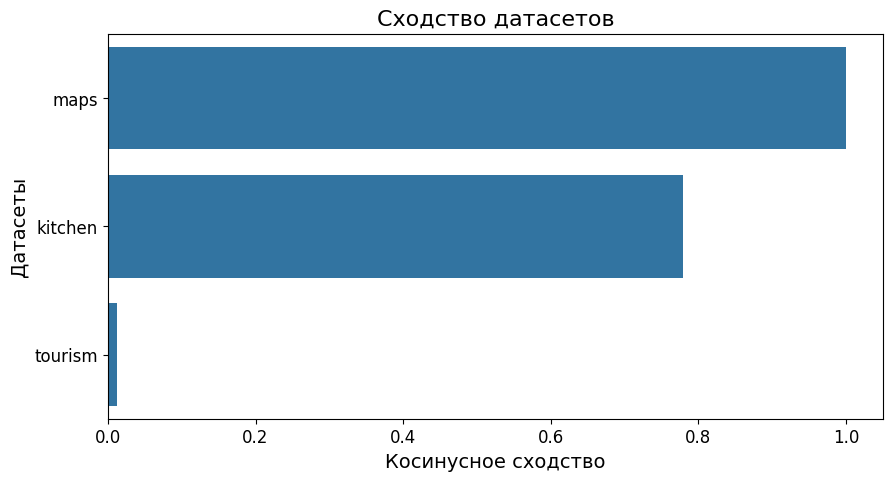

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Отсортировать cos_sim_df по столбцу 'maps' в порядке убывания
cos_sim_oos = cos_sim_df[['maps']].sort_values('maps', ascending=False)

# Создать диаграмму
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(y=cos_sim_oos.index, x=cos_sim_oos.maps, orient='h', ax=ax)

# Установить заголовок диаграммы
ax.set_title('Сходство датасетов', fontsize=16)

# Добавить метки на оси x
ax.set_xlabel('Косинусное сходство', fontsize=14)

# Добавить метки на оси y
ax.set_ylabel('Датасеты', fontsize=14)

# Установить размер шрифта меток на осях
ax.tick_params(axis='both', labelsize=12)

# Показать диаграмму
plt.show()


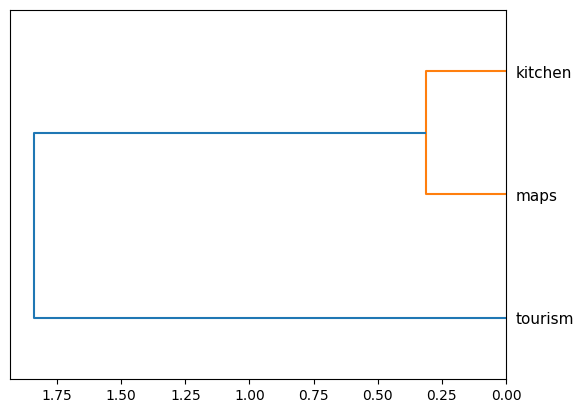

In [ ]:
from scipy.cluster import hierarchy
clusters = hierarchy.linkage(cos_sim_df, method = 'ward')
dendrogram = hierarchy.dendrogram(clusters,
                                  leaf_font_size=11,
                                  labels=list(cos_sim_df.index),
                                  orientation='left'
                                  )